In [1]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import pathlib as pl
import os 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Breast Cancer Screening Classification 

The dataset you will be working with comes from The Breast Cancer Surveillance Consortium, an American organisation that does research into Breast Cancer. To download a fresh copy of the dataset, go to https://www.bcsc-research.org/data/rfdataset, and for information on each of variables in the dataset, see https://www.bcsc-research.org/data/mammography_dataset/dataset_documentation.

In this notebook you will be looking at the effectiveness of mammogram breast cancer screening for women aged 60-83. For more information on breast cancer screening see https://www.cancerresearchuk.org/about-cancer/breast-cancer/getting-diagnosed/screening/breast-screening

In this notebook you will create confusion matrices and calculate the specificity and sensitivity of both the whole data and each age group within the datasets. 

### First load the dataset

In [2]:
path_csv = pl.Path(os.getcwd()) / f'm6-dataset.csv'
with open(path_csv, 'rb') as file:
    df = pd.read_csv(file)

## Section 1: Confusion Matrix 

### TODO: Write code to create a confusion matrix for the dataset

For this dataset, we are comparing the radiologist's assessment to the true cancer state of the patient. 

Values of  1, 2 or 3 in the assess_c column are counted as being predictions of no cancer, while predictions of 0, 4 or 5 are counted as being predictions of cancer. 

Use the 'cancer_c' column as the true indicator of if the patient has cancer, with 0 indicating no cancer and 1 indicating cancer. 

Use these values to calculate the number of true positives, false negatives, true negatives and false positives and plot a confusion matrix. 

HINT: you can use seaborn heatmaps to plot your confusion matrix. If you convert your confusion matrix into a dataframe first with correctly labelled columns and indexes, you can get the correct labels on your heatmap. 

In [3]:
df['prediction'] = df['assess_c'].apply(lambda x: 0 if x in [1,2,3] else 1)

In [4]:
df['assess_c'].unique()

array([1, 0, 2, 3, 4, 5], dtype=int64)

In [5]:
TP = len(df[(df['cancer_c']==1) & (df['prediction']==1)])
FN = len(df[(df['cancer_c']==1) & (df['prediction']==0)])
TN = len(df[(df['cancer_c']==0) & (df['prediction']==0)])
FP = len(df[(df['cancer_c']==0) & (df['prediction']==1)])

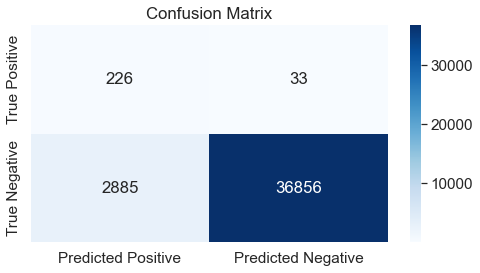

In [6]:
data = {'Predicted Positive': [TP, FP], 'Predicted Negative': [FN, TN]}
df_cm = pd.DataFrame(data, columns=['Predicted Positive', 'Predicted Negative'], index=['True Positive', 'True Negative'])

plt.figure(figsize=(8, 4))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


## Section 2: Calculate the Sensitivity and Specificity 

### TODO: Write a function to calculate the sensitivity and specificity of the breast cancer screening 

Calculate the sensitivity and specificity of the breast cancer screening and answer the first questions that go alongside this notebook. 

In [7]:
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)


Sensitivity: 0.8725868725868726
Specificity: 0.9274049470320324


## Section 3: Comparing the different Age Groups

### TODO: For each age group ( 60-69, 70-79 and 80-89) plot a confusion matrix and calculate the specificty and sensitivity 

In [8]:
df["age_group"] = pd.cut(df["age_c"], [60, 70, 80, 90])

In [9]:
# Create age groups
newlist = list(filter(None,df["age_group"].unique()))
newlist


[Interval(60.0, 70.0, closed='right'),
 Interval(70.0, 80.0, closed='right'),
 nan,
 Interval(80.0, 90.0, closed='right')]

In [10]:

# Define function to plot confusion matrix
def plot_confusion_matrix(TP,FN,TN,FP, age_group):

    # Create confusion matrix dataframe
    cm_df = pd.DataFrame({"Predicted Cancer": [TN, FP], "Predicted No Cancer": [FN, TP]},
                         index=["Actual Cancer", "Actual No Cancer"])

    # Plot confusion matrix heatmap
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm_df, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 14})
    plt.title(f"Confusion Matrix ({age_group})", fontsize=16)
    plt.xlabel("Predicted Label", fontsize=14)
    plt.ylabel("True Label", fontsize=14)
    plt.show()


Age Group: (60.0, 70.0]
True Positive : 121
False Positive : 1573
True Negative : 19273
False Negative : 17
Sensitivity: 0.8768115942028986
Specificity: 0.924541878537849



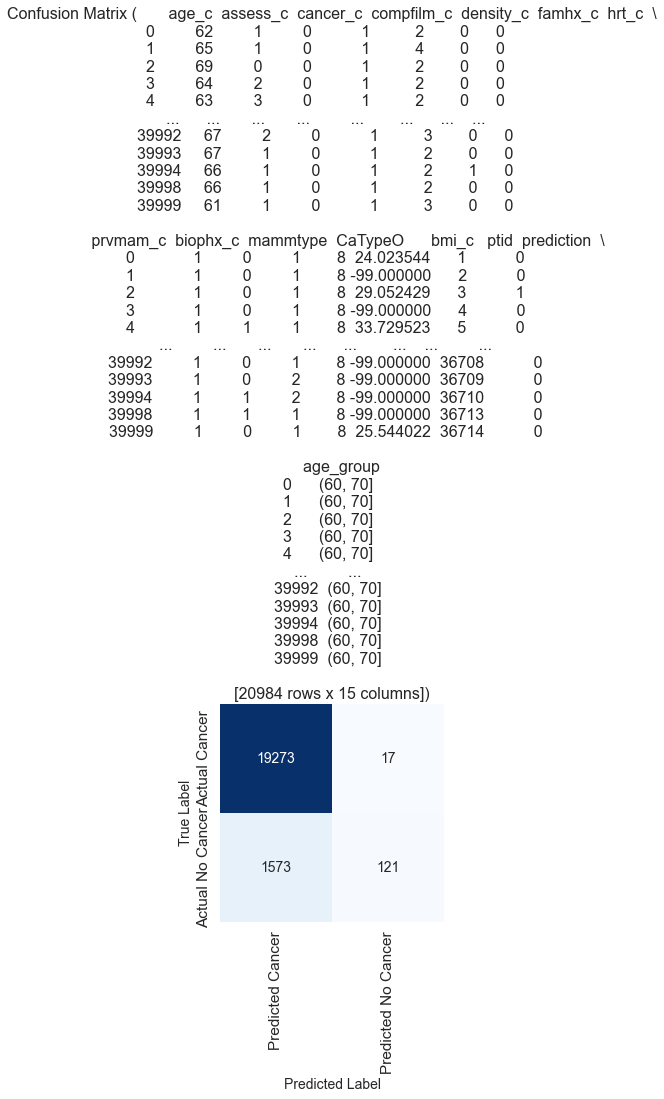

Age Group: (70.0, 80.0]
True Positive : 74
False Positive : 803
True Negative : 11662
False Negative : 10
Sensitivity: 0.8809523809523809
Specificity: 0.9355796229442439



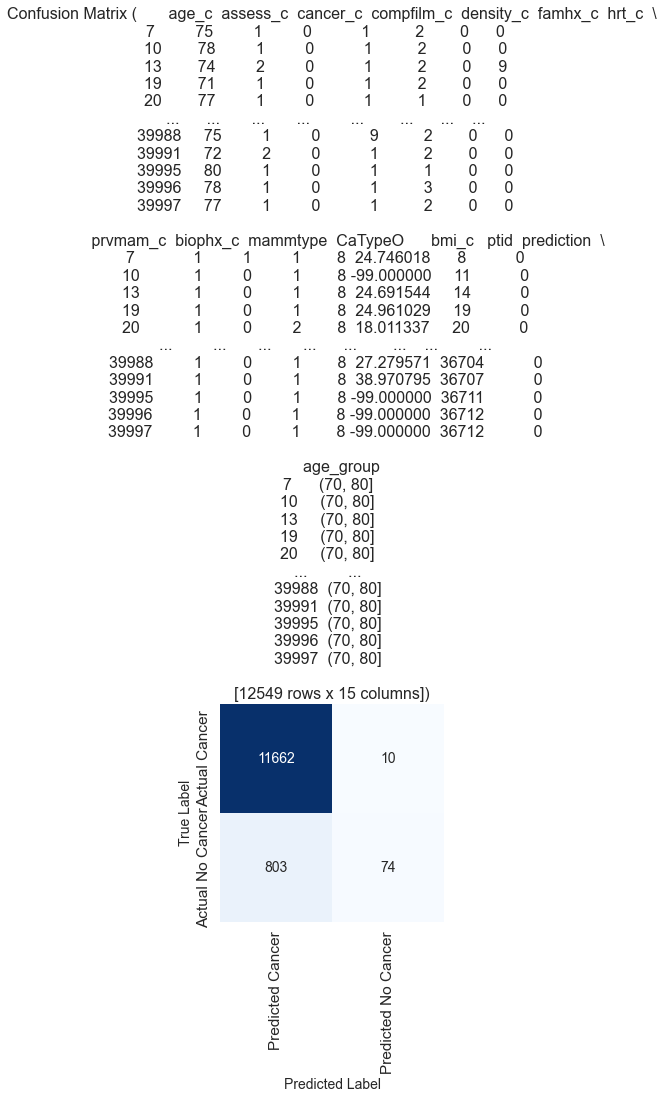

Age Group: (80.0, 90.0]
True Positive : 26
False Positive : 270
True Negative : 3363
False Negative : 4
Sensitivity: 0.8666666666666667
Specificity: 0.925681255161024



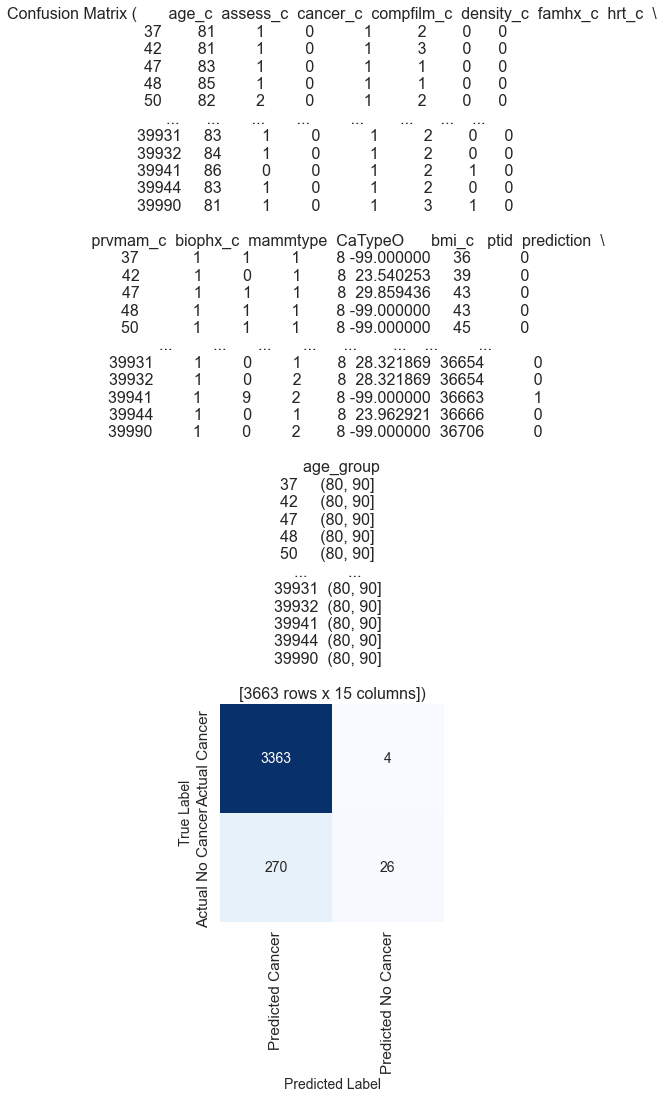

In [11]:

# Loop through age groups
for age_group in list(x for x in newlist if str(x) != 'nan') :
    # Filter the data by age group
    age_df = df[df["age_group"] == age_group]
    
    # Calculate true positives (TP), false negatives (FN), true negatives (TN), and false positives (FP)
    TP = len(age_df[(age_df["prediction"] == 1) & (age_df["cancer_c"] == 1)])
    FN = len(age_df[(age_df["prediction"] == 0) & (age_df["cancer_c"] == 1)])
    TN = len(age_df[(age_df["prediction"] == 0) & (age_df["cancer_c"] == 0)])
    FP = len(age_df[(age_df["prediction"] == 1) & (age_df["cancer_c"] == 0)])
    
    # Calculate sensitivity and specificity
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    
    # Print results
    print(f"Age Group: {age_group}")
    print(f"True Positive : {TP}")
    print(f"False Positive : {FP}")
    print(f"True Negative : {TN}")
    print(f"False Negative : {FN}")
    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")
    print("")
    
    plot_confusion_matrix(TP,FN,TN,FP,age_df)
